<a href="https://colab.research.google.com/github/REPsabah-for-science/4dv50e/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

'''The Four Types of Self-Adaptive Systems: a Metamodel by L. Sabatucci1
Self-Adaptive Systems: A Systematic Literature Review Across Categories and Domains by Terence Wong
Enhancing self‑adaptation for efficient decision‑making at run‑time in streaming applications on multicores by Adriano Vogel
Automated Machine Learning for Deep Learning based Malware Detection by Austin Brown'''

Mounted at /content/drive


'The Four Types of Self-Adaptive Systems: a Metamodel by L. Sabatucci1\nSelf-Adaptive Systems: A Systematic Literature Review Across Categories and Domains by Terence Wong\nEnhancing self‑adaptation for efficient decision‑making at run‑time in streaming applications on multicores by Adriano Vogel\nAutomated Machine Learning for Deep Learning based Malware Detection by Austin Brown'

In [2]:
# Upgrade pip first (best practice)
!python -m pip install --upgrade pip

# Install core libraries
!pip install --upgrade tensorflow
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn

# Install AutoGluon with all tabular extras (this includes core autogluon modules)
!pip install autogluon.tabular[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install autogluon.assistant
!pip install -U autogluon.assistant
!wget https://raw.githubusercontent.com/autogluon/autogluon-assistant/refs/heads/main/tools/configure_llms.sh
!git clone https://github.com/autogluon/autogluon-assistant.git cd autogluon-assistant && pip install -e "."
!pip install -r requirements.txt
!aga ui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 642.

In [ ]:
#################################################################################################################################################
                                   ####################### BATCH Dataset Preprocessing #######################
#################################################################################################################################################

In [ ]:
# CREATION OF ONE DATASET WITH BINARY CLASSIFICATION AND FEATURE SELECTION
# This code identifies the indices of the selected features.
from sklearn.ensemble import ExtraTreesClassifier
import json
import numpy as np
import time

# Number of files to process
c = 300
########################################################################################
# Load data function
def loadData():
    features = []
    packetLoss = []
    latency = []

    # Load data from JSON files
    for i in range(1, c + 1):
        data_path = f'/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/raw/dataset_with_all_features{i}.json'
        with open(data_path) as file:
            data = json.load(file)
            features.extend(data['features'])
            packetLoss.extend(data['packetloss'])
            latency.extend(data['latency'])

    # Create binary classification target based on packet loss and latency
    classificationTargets = [(1 if pl < 10 and la < 5 else 0) for pl, la in zip(packetLoss, latency)]

    # Calculate feature importance
    classifier = ExtraTreesClassifier(random_state=50)
    start_time = time.time()
    classifier.fit(features, classificationTargets)
    importances_classification = classifier.feature_importances_
    execution_time = time.time() - start_time

    # Get indices of selected features
    selected_indices = [i for i, importance in enumerate(importances_classification) if importance > 0]
    print('Execution time in seconds:', execution_time)
    print('Selected feature indices:', selected_indices)

    return selected_indices
########################################################################################
# Analyze and select features
def analyzeFeatureSelection(selected_features):
    new_features = []
    new_targets_pl = []
    new_targets_la = []

    # Process each dataset file and apply feature selection
    for i in range(1, c + 1):
        data_path = f'/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/raw/dataset_with_all_features{i}.json'
        with open(data_path) as file:
            data = json.load(file)

            # Transform and select features
            features_transformed = [np.array(option, dtype=int)[selected_features].tolist() for option in data['features']]
            new_features.extend(features_transformed)

            # Create binary targets for packet loss and latency based on conditions
            new_targets_pl.extend( data['packetloss']])
            new_targets_la.extend([ data['latency']])

    # Create binary class targets based on packet loss and latency conditions
    new_class_targets = [1 if pl < 10 and la < 5 else 0 for pl, la in zip(new_targets_pl, new_targets_la)]

    # Define the output dataset
    dataset_with_selected_features = {
        'features': new_features,
        'labels': new_class_targets
    }

    # Save the processed dataset
    output_file_path = '/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json'
    with open(output_file_path, 'w') as outfile:
        json.dump(dataset_with_selected_features, outfile, indent=4)
    print("Processed dataset saved to:", output_file_path)

    return new_features, new_class_targets

# Call the loadData function to get the selected feature indices
selected_features = loadData()

# Call analyzeFeatureSelection with the selected features
analyzeFeatureSelection(selected_features)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Execution time in seconds: 8.60216236114502
Selected feature indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 31, 39, 40, 43, 44, 46, 47, 59, 62]
Processed dataset saved to: /content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json


([[3,
   0,
   0,
   -1,
   -4,
   0,
   -2,
   0,
   0,
   0,
   2,
   0,
   -6,
   3,
   0,
   -1,
   -2,
   7,
   15,
   12,
   9,
   15,
   15,
   15,
   11,
   14,
   0,
   100,
   0,
   100,
   0,
   100,
   0,
   27],
  [3,
   0,
   0,
   -1,
   -4,
   0,
   -2,
   0,
   0,
   0,
   2,
   0,
   -6,
   3,
   0,
   -1,
   -2,
   7,
   15,
   12,
   9,
   15,
   15,
   15,
   11,
   14,
   20,
   80,
   0,
   100,
   0,
   100,
   0,
   27],
  [3,
   0,
   0,
   -1,
   -4,
   0,
   -2,
   0,
   0,
   0,
   2,
   0,
   -6,
   3,
   0,
   -1,
   -2,
   7,
   15,
   12,
   9,
   15,
   15,
   15,
   11,
   14,
   40,
   60,
   0,
   100,
   0,
   100,
   0,
   27],
  [3,
   0,
   0,
   -1,
   -4,
   0,
   -2,
   0,
   0,
   0,
   2,
   0,
   -6,
   3,
   0,
   -1,
   -2,
   7,
   15,
   12,
   9,
   15,
   15,
   15,
   11,
   14,
   60,
   40,
   0,
   100,
   0,
   100,
   0,
   27],
  [3,
   0,
   0,
   -1,
   -4,
   0,
   -2,
   0,
   0,
   0,
   2,
   0,
   -6,
   3,
   0,
   -1,

In [ ]:
import json

def count_labels(dataset_path):

    # Load the dataset
    with open(dataset_path) as file:
        dataset = json.load(file)

    # Count the occurrences of labels 0 and 1
    count_labels_0 = dataset['labels'].count(0)
    count_labels_1 = dataset['labels'].count(1)

    return count_labels_0, count_labels_1

# Specify the path to your generated dataset
dataset_path = '/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json'

# Count the occurrences of each label
count_labels_0, count_labels_1 = count_labels(dataset_path)

# Print the counts
print("Count of label 0:", count_labels_0)
print("Count of label 1:", count_labels_1)


Count of label 0: 42573
Count of label 1: 22227


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


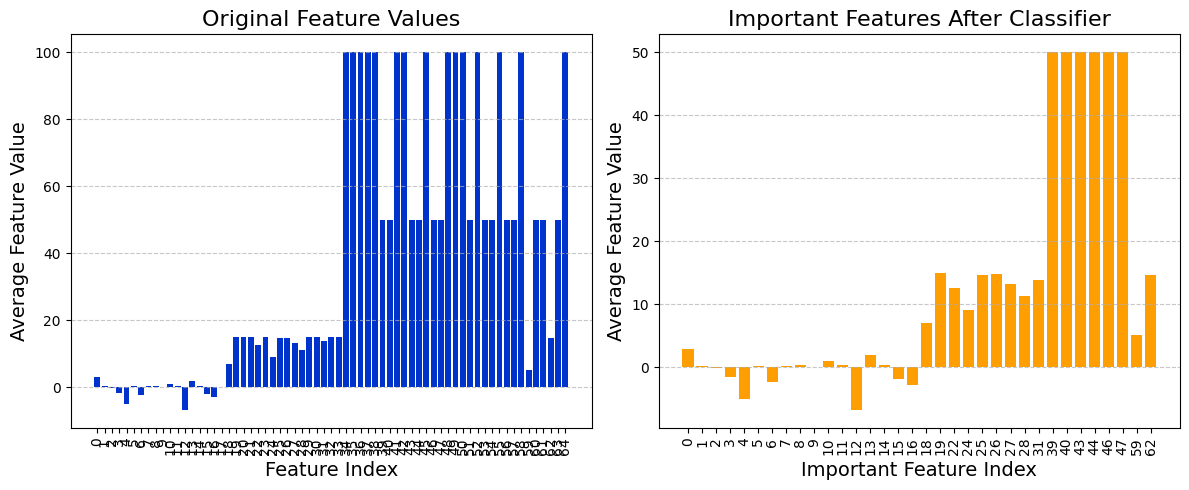

Original Features Mean Values:
[ 2.93573786e+00  2.59016527e-01 -1.76222807e-01 -1.56366214e+00
 -4.97846214e+00  2.71119193e-01 -2.33336214e+00  2.62111860e-01
  4.05272527e-01  4.70679924e-02  1.06852386e+00  3.62137860e-01
 -6.80086214e+00  1.96243215e+00  3.09199860e-01 -1.91326214e+00
 -2.81296214e+00  0.00000000e+00  6.99333333e+00  1.49966667e+01
  1.50000000e+01  1.50000000e+01  1.25933333e+01  1.50000000e+01
  9.13000000e+00  1.46866667e+01  1.48300000e+01  1.32166667e+01
  1.12500000e+01  1.50000000e+01  1.50000000e+01  1.37900000e+01
  1.50000000e+01  1.50000000e+01  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  5.00000000e+01
  5.00000000e+01  1.00000000e+02  1.00000000e+02  5.00000000e+01
  5.00000000e+01  1.00000000e+02  5.00000000e+01  5.00000000e+01
  1.00000000e+02  1.00000000e+02  1.00000000e+02  5.00000000e+01
  1.00000000e+02  5.00000000e+01  5.00000000e+01  1.00000000e+02
  5.00000000e+01  5.00000000e+01  1.00000000e+02  5.1633333

In [ ]:
# Only plotting original_indices and important_indices
import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

data_path_without_selection = '/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json'
with open(data_path_without_selection, 'r') as f:
    data_without_selection = json.load(f)

features_without_selection = np.array(data_without_selection['features'])
target_without_selection = np.array(data_without_selection['labels'])

plt.figure(figsize=(12, 5))

# Plot original features
plt.subplot(1, 2, 1)
plt.bar(range(features_without_selection.shape[1]), np.mean(features_without_selection, axis=0), color='#0033cc')
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('Average Feature Value', fontsize=14)
plt.title('Original Feature Values', fontsize=16)
plt.xticks(range(features_without_selection.shape[1]), range(features_without_selection.shape[1]), rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

important_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 31, 39, 40, 43, 44, 46, 47, 59, 62]
original_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]

# Extract important features based on the important indices
important_features = features_without_selection[:, important_indices]

# Plot important features
plt.subplot(1, 2, 2)
plt.bar(range(len(important_indices)), np.mean(important_features, axis=0), color='#ff9e00')
plt.xticks(range(len(important_indices)), important_indices, rotation=90, fontsize=10)
plt.xlabel('Important Feature Index', fontsize=14)
plt.ylabel('Average Feature Value', fontsize=14)
plt.title('Important Features After Classifier', fontsize=16)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print('Original Features Mean Values:')
print(np.mean(features_without_selection, axis=0))
print('Important Features Mean Values:')
print(np.mean(important_features, axis=0))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


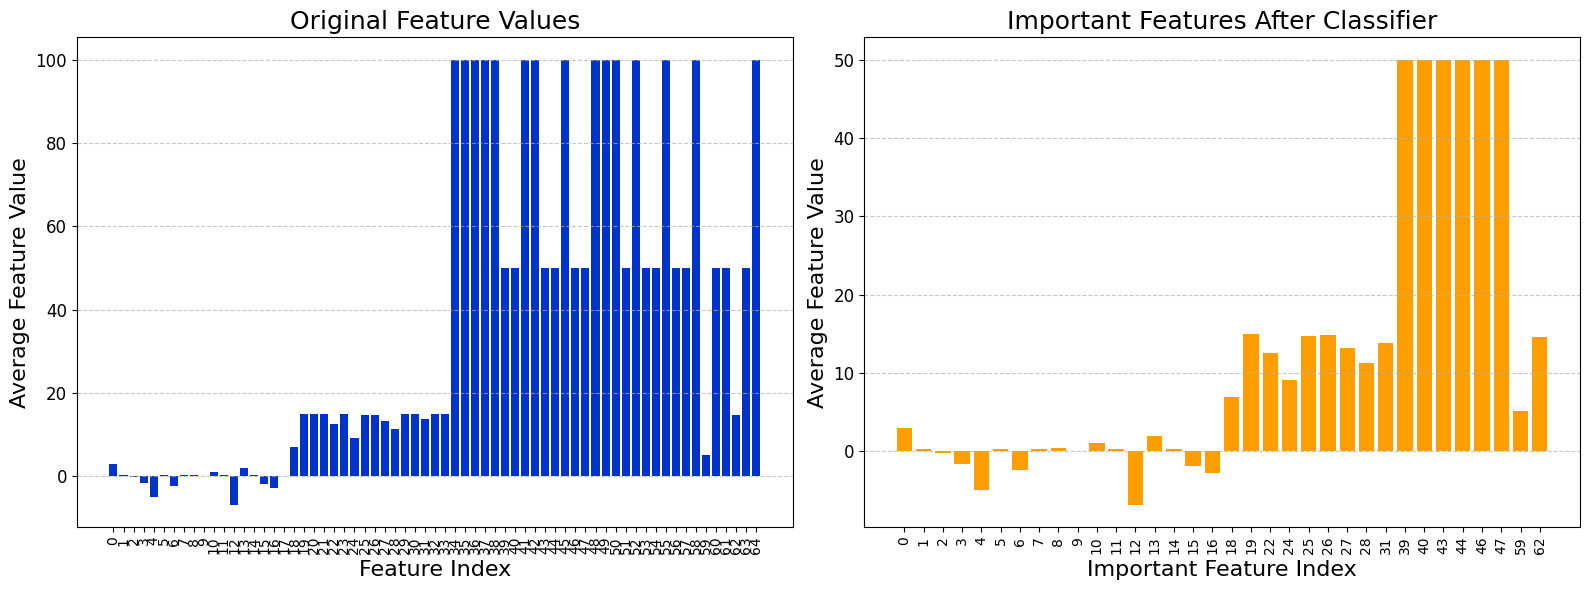

Original Features Mean Values:
[ 2.93573786e+00  2.59016527e-01 -1.76222807e-01 -1.56366214e+00
 -4.97846214e+00  2.71119193e-01 -2.33336214e+00  2.62111860e-01
  4.05272527e-01  4.70679924e-02  1.06852386e+00  3.62137860e-01
 -6.80086214e+00  1.96243215e+00  3.09199860e-01 -1.91326214e+00
 -2.81296214e+00  0.00000000e+00  6.99333333e+00  1.49966667e+01
  1.50000000e+01  1.50000000e+01  1.25933333e+01  1.50000000e+01
  9.13000000e+00  1.46866667e+01  1.48300000e+01  1.32166667e+01
  1.12500000e+01  1.50000000e+01  1.50000000e+01  1.37900000e+01
  1.50000000e+01  1.50000000e+01  1.00000000e+02  1.00000000e+02
  1.00000000e+02  1.00000000e+02  1.00000000e+02  5.00000000e+01
  5.00000000e+01  1.00000000e+02  1.00000000e+02  5.00000000e+01
  5.00000000e+01  1.00000000e+02  5.00000000e+01  5.00000000e+01
  1.00000000e+02  1.00000000e+02  1.00000000e+02  5.00000000e+01
  1.00000000e+02  5.00000000e+01  5.00000000e+01  1.00000000e+02
  5.00000000e+01  5.00000000e+01  1.00000000e+02  5.1633333

In [ ]:
# Only plotting original_indices and important_indices

import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data_path_without_selection = '/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Combined_binary_dataset_Without_FeatureSelection.json'
with open(data_path_without_selection, 'r') as f:
    data_without_selection = json.load(f)

features_without_selection = np.array(data_without_selection['features'])
target_without_selection = np.array(data_without_selection['labels'])

# Create a figure for the plots
plt.figure(figsize=(16, 6))  # Increased figure size for better readability

# Plot original features
plt.subplot(1, 2, 1)
plt.bar(range(features_without_selection.shape[1]), np.mean(features_without_selection, axis=0), color='#0033cc')
plt.xlabel('Feature Index', fontsize=16)  # Increased font size
plt.ylabel('Average Feature Value', fontsize=16)  # Increased font size
plt.title('Original Feature Values', fontsize=18)  # Increased font size
plt.xticks(range(features_without_selection.shape[1]), rotation=90, fontsize=10)  # Show all ticks
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define important indices
important_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 31, 39, 40, 43, 44, 46, 47, 59, 62]

# Extract important features based on the important indices
important_features = features_without_selection[:, important_indices]

# Plot important features
plt.subplot(1, 2, 2)
plt.bar(range(len(important_indices)), np.mean(important_features, axis=0), color='#ff9e00')
plt.xticks(range(len(important_indices)), important_indices, rotation=90, fontsize=10)  # Show all important ticks
plt.xlabel('Important Feature Index', fontsize=16)  # Increased font size
plt.ylabel('Average Feature Value', fontsize=16)  # Increased font size
plt.title('Important Features After Classifier', fontsize=18)  # Increased font size
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Print mean values
print('Original Features Mean Values:')
print(np.mean(features_without_selection, axis=0))
print('Important Features Mean Values:')

print(np.mean(important_features, axis=0))

Mounted at /content/drive


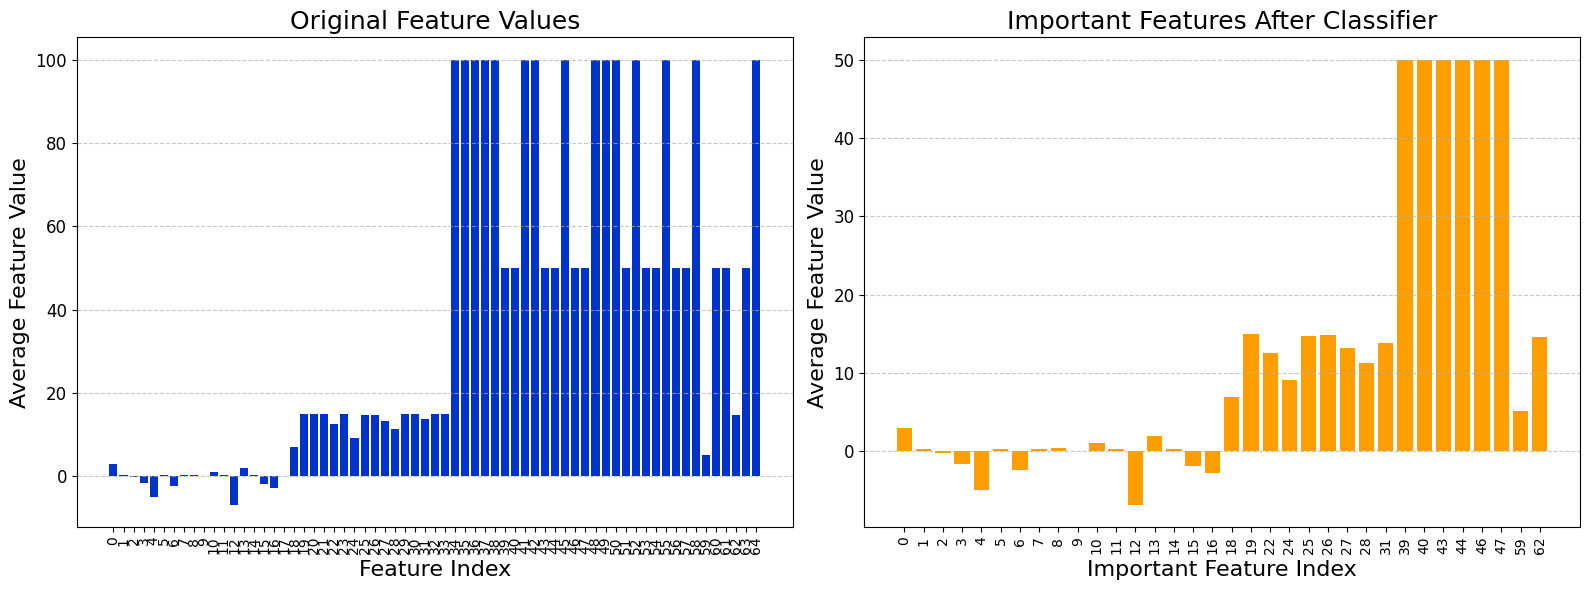

Figure saved successfully at: /content/drive/MyDrive/high_quality_figure.png


In [ ]:
# Only plotting original_indices and important_indices

import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data_path_without_selection = '/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Combined_binary_dataset_Without_FeatureSelection.json'
with open(data_path_without_selection, 'r') as f:
    data_without_selection = json.load(f)

features_without_selection = np.array(data_without_selection['features'])
target_without_selection = np.array(data_without_selection['labels'])

# Create a figure for the plots
plt.figure(figsize=(16, 6))  # Increased figure size for better readability

# Plot original features
plt.subplot(1, 2, 1)
plt.bar(range(features_without_selection.shape[1]), np.mean(features_without_selection, axis=0), color='#0033cc')
plt.xlabel('Feature Index', fontsize=16)
plt.ylabel('Average Feature Value', fontsize=16)
plt.title('Original Feature Values', fontsize=18)
plt.xticks(range(features_without_selection.shape[1]), rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define important indices
important_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22, 24, 25, 26, 27, 28, 31, 39, 40, 43, 44, 46, 47, 59, 62]

# Extract important features based on the important indices
important_features = features_without_selection[:, important_indices]

# Plot important features
plt.subplot(1, 2, 2)
plt.bar(range(len(important_indices)), np.mean(important_features, axis=0), color='#ff9e00')
plt.xticks(range(len(important_indices)), important_indices, rotation=90, fontsize=10)
plt.xlabel('Important Feature Index', fontsize=16)
plt.ylabel('Average Feature Value', fontsize=16)
plt.title('Important Features After Classifier', fontsize=18)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Define save path in Google Drive
save_path = '/content/drive/MyDrive/high_quality_figure.png'

# Save figure with 1200 DPI
plt.savefig(save_path, dpi=1200, bbox_inches='tight')
plt.show()

print(f'Figure saved successfully at: {save_path}')


/tmp/ipython-input-2-2206235936.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts_before, palette=custom_colors * 2)
/tmp/ipython-input-2-2206235936.py:15: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=labels, y=counts_before, palette=custom_colors * 2)


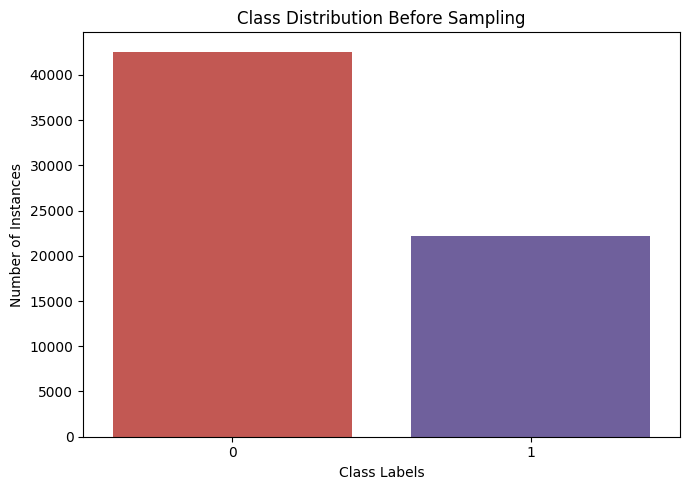

In [ ]:
## Only plotting the Unbalancing of my datasets BEFORE RESAMPLING with good colors

import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors (from the uploaded image)
custom_colors = ['#D44741', '#6A56A6']

# Labels and their counts before sampling
labels = [0, 1]
counts_before = [42573,  22227]

# Plot bar chart for class distribution before sampling
plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=counts_before, palette=custom_colors * 2)
plt.title("Class Distribution Before Sampling")
plt.xlabel("Class Labels")
plt.ylabel("Number of Instances")
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-2162339134.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts_after, palette=custom_colors * 2)
/tmp/ipython-input-3-2162339134.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=labels, y=counts_after, palette=custom_colors * 2)


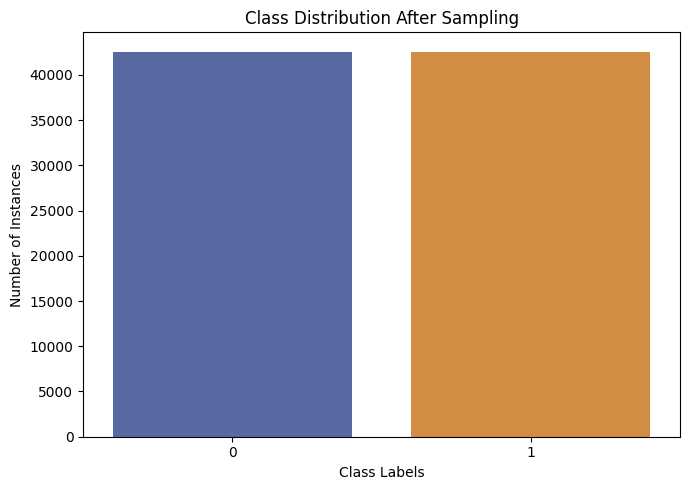

In [ ]:
## Only plotting my datasets after RESAMPLING

import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors
custom_colors = ['#4B63AC', '#E88E2D']


# Labels and their counts after sampling
labels = [0, 1]
counts_after = [42573, 42573]

# Plot bar chart for class distribution after sampling
plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=counts_after, palette=custom_colors * 2)
plt.title("Class Distribution After Sampling")
plt.xlabel("Class Labels")
plt.ylabel("Number of Instances")
plt.tight_layout()
plt.show()


Class Distribution in Training Data:
0    34058
1    17782
Name: count, dtype: int64

Class Distribution in Test Data:
0    8515
1    4445
Name: count, dtype: int64


/tmp/ipython-input-3-3389196777.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_label_counts.index.astype(str), y=train_label_counts.values, palette=custom_colors)


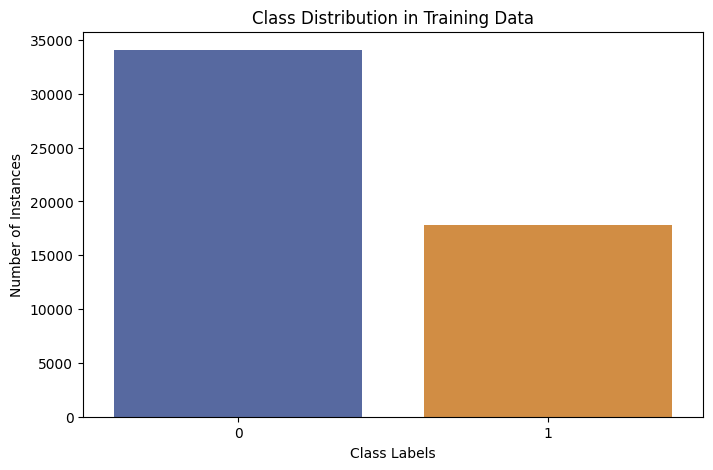

/tmp/ipython-input-3-3389196777.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_label_counts.index.astype(str), y=test_label_counts.values, palette=custom_colors)


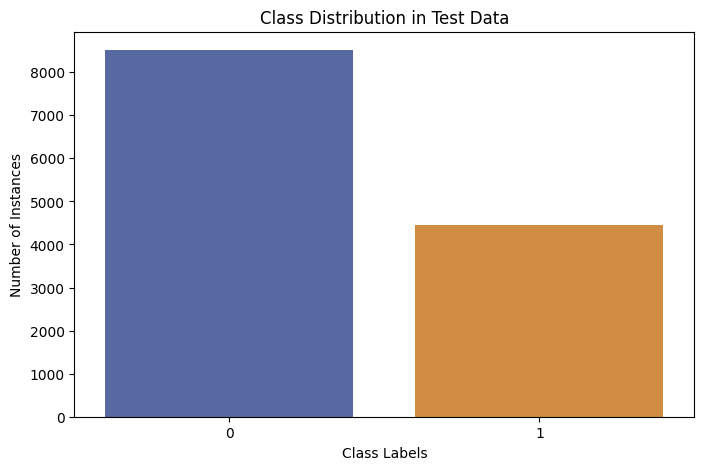

In [ ]:
## Plotting train and test datasets to show the RESAMPLING in each part

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the JSON dataset
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/Binary-300int-packetlossETlatency-Without-feature-selection.json', 'r') as f:
    data = json.load(f)

# Extract features and labels
x = np.array(data['features'])
y = np.array(data['labels'])

# Split into train and test sets (67% train, 33% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

# Count and print class distribution for training data
train_label_counts = pd.Series(y_train).value_counts().sort_index()
print("Class Distribution in Training Data:")
print(train_label_counts)

# Count and print class distribution for test data
test_label_counts = pd.Series(y_test).value_counts().sort_index()
print("\nClass Distribution in Test Data:")
print(test_label_counts)

# Define custom colors
custom_colors = ['#4B63AC', '#E88E2D']

# Plot class distribution for training data
plt.figure(figsize=(8, 5))
sns.barplot(x=train_label_counts.index.astype(str), y=train_label_counts.values, palette=custom_colors)
plt.xlabel("Class Labels")
plt.ylabel("Number of Instances")
plt.title("Class Distribution in Training Data")
plt.show()

# Plot class distribution for test data
plt.figure(figsize=(8, 5))
sns.barplot(x=test_label_counts.index.astype(str), y=test_label_counts.values, palette=custom_colors)
plt.xlabel("Class Labels")
plt.ylabel("Number of Instances")
plt.title("Class Distribution in Test Data")
plt.show()


Class Distribution in Training Data:
 0    34058
1    17782
Name: count, dtype: int64

Class Distribution in Test Data:
 0    8515
1    4445
Name: count, dtype: int64


/tmp/ipython-input-4-438424475.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4-438424475.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


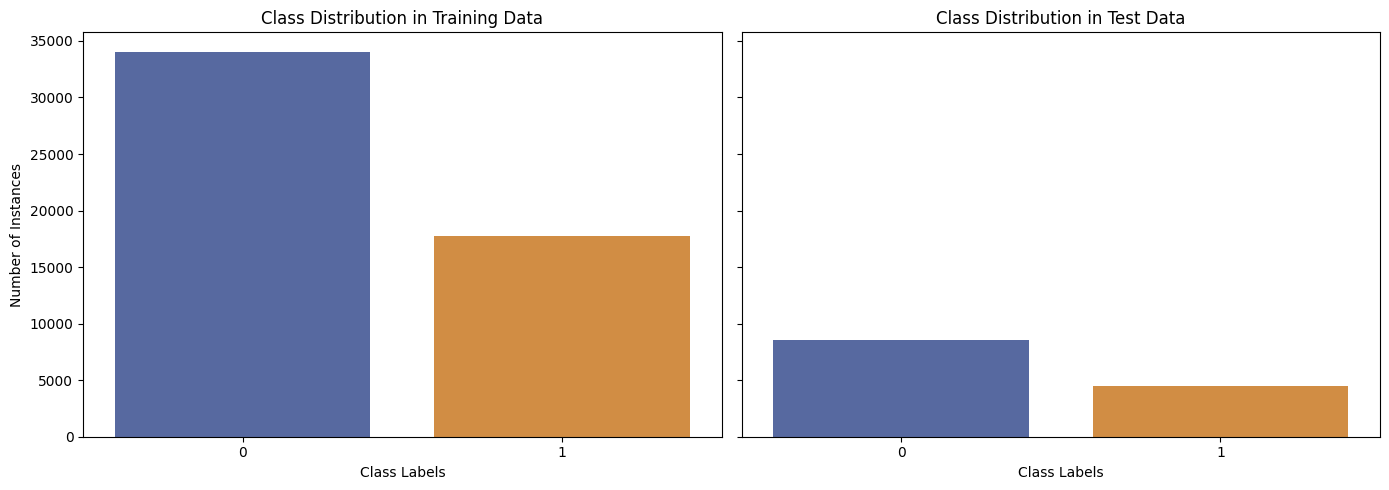

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the JSON dataset
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/Binary-300int-packetlossETlatency-Without-feature-selection.json', 'r') as f:
    data = json.load(f)

# Extract features and labels
x = np.array(data['features'])
y = np.array(data['labels'])

# Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

# Count class distributions
train_label_counts = pd.Series(y_train).value_counts().sort_index()
test_label_counts = pd.Series(y_test).value_counts().sort_index()

# Print class distributions
print("Class Distribution in Training Data:\n", train_label_counts)
print("\nClass Distribution in Test Data:\n", test_label_counts)

# Plot side-by-side bar plots
custom_colors = ['#4B63AC', '#E88E2D']
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Training plot
sns.barplot(
    ax=axes[0],
    x=train_label_counts.index.astype(str),
    y=train_label_counts.values,
    palette=custom_colors
)
axes[0].set_title("Class Distribution in Training Data")
axes[0].set_xlabel("Class Labels")
axes[0].set_ylabel("Number of Instances")

# Test plot
sns.barplot(
    ax=axes[1],
    x=test_label_counts.index.astype(str),
    y=test_label_counts.values,
    palette=custom_colors
)
axes[1].set_title("Class Distribution in Test Data")
axes[1].set_xlabel("Class Labels")
axes[1].set_ylabel("")  # No need to repeat y-label

plt.tight_layout()
plt.show()


In [ ]:
####################### BATCH MODE #######################

In [ ]:
# Install AutoGluon with the Tabular module and all dependencies
from autogluon.tabular import TabularPredictor
from autogluon.common import space
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, matthews_corrcoef,
                             roc_curve, auc, precision_recall_curve, average_precision_score)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from JSON file
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json', 'r') as f:
    data = json.load(f)

x = np.array(data['features'])
y = np.array(data['labels'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

train_data = pd.DataFrame(x_train)
train_data['label'] = y_train
test_data = pd.DataFrame(x_test)
test_data['label'] = y_test
start_time = time.time()

#################################################################3
hyperparameters = {
    'NN_TORCH':{} ,
    'FASTAI': {} ,
    }

time_limit = 10 * 60  # Train models for approximately 6 minutes
num_trials = 5       # Try at most 5 different hyperparameter configurations for each model type
search_strategy = 'auto'  # Random search routine with a local scheduler
#################################################################3
hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}
#################################################################
predictor = TabularPredictor(label='label').fit(
    train_data=train_data,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)
#################################################################

# Show the leaderboard of the fitted models
leaderboard = predictor.leaderboard(silent=True)
print("Results leaderboard:", leaderboard)

# Evaluate models on the test set and compute additional metrics
test_pred = predictor.predict(test_data.drop(columns=['label']))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred, average='weighted')  # Weighted for multi-class
mcc = matthews_corrcoef(y_test, test_pred)

# Display the leaderboard
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# Print additional metrics
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print("#################################################################")
# Display chosen hyperparameters for each model
print("\nChosen Hyperparameters for Each Model:")
for model_name in predictor.model_names():
    hyperparameters = predictor.info()['model_info'][model_name]['hyperparameters']
    print(f"\nModel: {model_name}")
    print("Hyperparameters:")
    for param, value in hyperparameters.items():
        print(f"  {param}: {value}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No path specified. Models will be saved in: "AutogluonModels/ag-20250226_134540"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.03 GB / 12.67 GB (87.1%)
Disk Space Avail:   73.48 GB / 107.72 GB (68.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

+----------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI   |
+----------------------------------------------------+
| Search algorithm                 SearchGenerator   |
| Scheduler                        FIFOScheduler     |
| Number of trials                 5                 |
+----------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_134540/models/NeuralNetFastAI



Fitted model: NeuralNetFastAI/5da3f39e ...
	0.9446	 = Validation score   (accuracy)
	123.4s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: NeuralNetFastAI/b6799274 ...
	0.9372	 = Validation score   (accuracy)
	167.79s	 = Training   runtime
	0.35s	 = Validation runtime
Fitted model: NeuralNetFastAI/67d9a97b ...
	0.9428	 = Validation score   (accuracy)
	26.56s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetFastAI/ef3fdd60 ...
	0.9266	 = Validation score   (accuracy)
	33.25s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: NeuralNetFastAI/a082b995 ...
	0.932	 = Validation score   (accuracy)
	16.31s	 = Training   runtime
	0.05s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 269.84s of the 379.9s of remaining time.


+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 5                |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250226_134540/models/NeuralNetTorch


Fitted model: NeuralNetTorch/dce934b4 ...
	0.9508	 = Validation score   (accuracy)
	262.33s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/387f8934 ...
	0.9208	 = Validation score   (accuracy)
	258.57s	 = Training   runtime
	0.1s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 108.90s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/dce934b4': 0.6, 'NeuralNetFastAI/5da3f39e': 0.2, 'NeuralNetFastAI/b6799274': 0.2}
	0.9532	 = Validation score   (accuracy)
	0.12s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 491.29s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 9354.8 rows/s (5000 batch size)
Disabling decision threshold calibration for metric `accuracy` due to having fewer than 10000 rows of validation data for calibration, to avoid overfitting (5000 rows).
	`accuracy` is generally not improved through threshold calibration. Force calibration via specifying `calibrate_decision_threshold=True`.
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250226_134540")


Results leaderboard:                       model  score_val eval_metric  pred_time_val    fit_time  \
0       WeightedEnsemble_L2     0.9532    accuracy       0.534484  553.646863   
1   NeuralNetTorch/dce934b4     0.9508    accuracy       0.040819  262.327500   
2  NeuralNetFastAI/5da3f39e     0.9446    accuracy       0.143251  123.404048   
3  NeuralNetFastAI/67d9a97b     0.9428    accuracy       0.051280   26.559836   
4  NeuralNetFastAI/b6799274     0.9372    accuracy       0.348887  167.793919   
5  NeuralNetFastAI/a082b995     0.9320    accuracy       0.047264   16.314130   
6  NeuralNetFastAI/ef3fdd60     0.9266    accuracy       0.048149   33.247699   
7   NeuralNetTorch/387f8934     0.9208    accuracy       0.097142  258.570697   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.001527           0.121396            2       True   
1                0.040819         262.327500            1       True   
2                0.143251        

In [ ]:
#######################################################################################################################


In [ ]:
# Install AutoGluon with the Tabular module and all dependencies
from autogluon.tabular import TabularPredictor
from autogluon.common import space
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, f1_score, matthews_corrcoef,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from JSON file
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json', 'r') as f:
    data = json.load(f)

x = np.array(data['features'])
y = np.array(data['labels'])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create DataFrames for AutoGluon
train_data = pd.DataFrame(x_train)
train_data['label'] = y_train
test_data = pd.DataFrame(x_test)
test_data['label'] = y_test

# Define hyperparameters and tuning strategy
hyperparameters = {
    'NN_TORCH': {},
    'FASTAI': {},
}

time_limit = 10 * 60  # 10 minutes
num_trials = 5
search_strategy = 'random'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}

# Fit AutoGluon predictor
start_time = time.time()
predictor = TabularPredictor(label='label').fit(
    train_data=train_data,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)
training_time_autogluon = time.time() - start_time
##################################################################################################################################
# Show leaderboard on test data
leaderboard = predictor.leaderboard(test_data, silent=True)
print("Results leaderboard:")
print(leaderboard)

# Predict labels and probabilities
test_pred = predictor.predict(test_data.drop(columns=['label']))
predictions_proba = predictor.predict_proba(test_data.drop(columns=['label']))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred, average='binary')  # Binary classification
mcc = matthews_corrcoef(y_test, test_pred)

print(f"\nTraining Time (AutoGluon): {training_time_autogluon:.2f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test MCC: {mcc:.4f}")
##################################################################################################################################
# Display chosen hyperparameters for each model
print("\nChosen Hyperparameters for Each Model:")
for model_name in predictor.model_names():
    hyperparams = predictor.info()['model_info'][model_name]['hyperparameters']
    print(f"\nModel: {model_name}")
    for param, value in hyperparams.items():
        print(f"  {param}: {value}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No path specified. Models will be saved in: "AutogluonModels/ag-20250625_152229"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.17 GB / 12.67 GB (80.2%)
Disk Space Avail:   62.89 GB / 107.72 GB (58.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

+----------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI   |
+----------------------------------------------------+
| Search algorithm                 SearchGenerator   |
| Scheduler                        FIFOScheduler     |
| Number of trials                 5                 |
+----------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250625_152229/models/NeuralNetFastAI


Fitted model: NeuralNetFastAI/7e6383d1 ...
	0.9446	 = Validation score   (accuracy)
	67.16s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetFastAI/e392a91a ...
	0.9406	 = Validation score   (accuracy)
	119.33s	 = Training   runtime
	0.21s	 = Validation runtime
Fitted model: NeuralNetFastAI/87eaed4d ...
	0.9424	 = Validation score   (accuracy)
	26.44s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetFastAI/5d49db5e ...
	0.9208	 = Validation score   (accuracy)
	14.92s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetFastAI/ff93d0b0 ...
	0.9382	 = Validation score   (accuracy)
	10.43s	 = Training   runtime
	0.03s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 269.86s of the 331.76s of remaining time.



+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 5                |
+---------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250625_152229/models/NeuralNetTorch


Fitted model: NeuralNetTorch/886ddf8f ...
	0.951	 = Validation score   (accuracy)
	228.65s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/a117e51b ...
	0.9436	 = Validation score   (accuracy)
	26.38s	 = Training   runtime
	0.02s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 58.73s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/886ddf8f': 0.625, 'NeuralNetFastAI/e392a91a': 0.25, 'NeuralNetTorch/a117e51b': 0.125}
	0.9532	 = Validation score   (accuracy)
	0.08s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 541.42s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 18953.9 rows/s (5000 batch size)
Disabling decision threshold calibration for metric `accuracy` due to having fewer than 10000 rows of validation data for calibration, to avoid overfitting (5000 rows).
	`accuracy` is generally not improved through threshold calibration. Force calibration via specifying `calibrate_decision_threshold=True`.
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250625_152229")


Results leaderboard:
                      model  score_test  score_val eval_metric  \
0       WeightedEnsemble_L2    0.943981     0.9532    accuracy   
1   NeuralNetTorch/886ddf8f    0.941667     0.9510    accuracy   
2  NeuralNetFastAI/7e6383d1    0.939969     0.9446    accuracy   
3  NeuralNetFastAI/87eaed4d    0.939429     0.9424    accuracy   
4   NeuralNetTorch/a117e51b    0.938194     0.9436    accuracy   
5  NeuralNetFastAI/e392a91a    0.936728     0.9406    accuracy   
6  NeuralNetFastAI/ff93d0b0    0.932793     0.9382    accuracy   
7  NeuralNetFastAI/5d49db5e    0.918056     0.9208    accuracy   

   pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  \
0        0.699831       0.263798  374.433075                 0.003238   
1        0.052501       0.027673  228.646770                 0.052501   
2        0.201538       0.072975   67.162281                 0.201538   
3        0.063871       0.044928   26.443302                 0.063871   
4        0.040425  

In [ ]:
#WITH G-Mean
# Install AutoGluon with the Tabular module and all dependencies
from autogluon.tabular import TabularPredictor
from autogluon.common import space
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, f1_score, matthews_corrcoef,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import json

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from JSON file
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json', 'r') as f:
    data = json.load(f)

x = np.array(data['features'])
y = np.array(data['labels'])

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create DataFrames for AutoGluon
train_data = pd.DataFrame(x_train)
train_data['label'] = y_train
test_data = pd.DataFrame(x_test)
test_data['label'] = y_test

# Define hyperparameters and tuning strategy
hyperparameters = {
    'NN_TORCH': {},
    'FASTAI': {},
}

time_limit = 10 * 60  # 10 minutes
num_trials = 5
search_strategy = 'random'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler': 'local',
    'searcher': search_strategy,
}

# Fit AutoGluon predictor
start_time = time.time()
predictor = TabularPredictor(label='label').fit(
    train_data=train_data,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)
training_time_autogluon = time.time() - start_time

##################################################################################################################################
# Show leaderboard on test data
leaderboard = predictor.leaderboard(test_data, silent=True)
print("Results leaderboard:")
print(leaderboard)

# Predict labels and probabilities
test_pred = predictor.predict(test_data.drop(columns=['label']))
predictions_proba = predictor.predict_proba(test_data.drop(columns=['label']))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred, average='binary')  # Binary classification
mcc = matthews_corrcoef(y_test, test_pred)

# Compute G-Mean
cm = confusion_matrix(y_test, test_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
gmean = np.sqrt(sensitivity * specificity)

print(f"\nTraining Time (AutoGluon): {training_time_autogluon:.2f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test MCC: {mcc:.4f}")
print(f"Test G-Mean: {gmean:.4f}")
##################################################################################################################################
# Display chosen hyperparameters for each model
print("\nChosen Hyperparameters for Each Model:")
for model_name in predictor.model_names():
    hyperparams = predictor.info()['model_info'][model_name]['hyperparameters']
    print(f"\nModel: {model_name}")
    for param, value in hyperparams.items():
        print(f"  {param}: {value}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No path specified. Models will be saved in: "AutogluonModels/ag-20250706_094443"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.87 GB / 12.67 GB (85.7%)
Disk Space Avail:   62.77 GB / 107.72 GB (58.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competition

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI       |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 5                     |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250706_094443/models/NeuralNetFastAI



Fitted model: NeuralNetFastAI/dc60f_00000 ...
	0.9446	 = Validation score   (accuracy)
	71.03s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: NeuralNetFastAI/dc60f_00001 ...
	0.9318	 = Validation score   (accuracy)
	29.31s	 = Training   runtime
	0.06s	 = Validation runtime
Fitted model: NeuralNetFastAI/dc60f_00002 ...
	0.9314	 = Validation score   (accuracy)
	11.11s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetFastAI/dc60f_00003 ...
	0.894	 = Validation score   (accuracy)
	9.45s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetFastAI/dc60f_00004 ...
	0.9406	 = Validation score   (accuracy)
	86.27s	 = Training   runtime
	0.42s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch ... Tuning model for up to 269.84s of the 352.24s of remaining time.


+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 5                     |
+--------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250706_094443/models/NeuralNetTorch


Fitted model: NeuralNetTorch/6bf05_00000 ...
	0.951	 = Validation score   (accuracy)
	261.72s	 = Training   runtime
	0.04s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 78.54s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/6bf05_00000': 0.632, 'NeuralNetFastAI/dc60f_00004': 0.263, 'NeuralNetFastAI/dc60f_00000': 0.053, 'NeuralNetFastAI/dc60f_00001': 0.053}
	0.953	 = Validation score   (accuracy)
	0.09s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 521.61s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 7686.7 rows/s (5000 batch size)
Disabling decision threshold calibration for metric `accuracy` due to having fewer than 10000 rows of validation data for calibration, to avoid overfitting (5000 rows).
	`accuracy` is generally not improved through threshold calibration. Force calibration via specifying `calibrate_decision_threshold=True`.
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250706_094443")


Results leaderboard:
                         model  score_test  score_val eval_metric  \
0          WeightedEnsemble_L2    0.943827     0.9530    accuracy   
1   NeuralNetTorch/6bf05_00000    0.941667     0.9510    accuracy   
2  NeuralNetFastAI/dc60f_00000    0.939969     0.9446    accuracy   
3  NeuralNetFastAI/dc60f_00004    0.936651     0.9406    accuracy   
4  NeuralNetFastAI/dc60f_00001    0.928395     0.9318    accuracy   
5  NeuralNetFastAI/dc60f_00002    0.928086     0.9314    accuracy   
6  NeuralNetFastAI/dc60f_00003    0.892670     0.8940    accuracy   

   pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  \
0        1.158247       0.650475  448.429991                 0.004049   
1        0.058319       0.041262  261.723203                 0.058319   
2        0.203098       0.129487   71.034293                 0.203098   
3        0.683481       0.415556   86.273366                 0.683481   
4        0.209300       0.062728   29.313511                 

In [ ]:
from sklearn.metrics import confusion_matrix

print("\nPerformance of Each Model in the Leaderboard:")
print("------------------------------------------------")
for model_name in predictor.model_names():
    # Predict using the specific model
    test_pred_model = predictor.predict(test_data.drop(columns=['label']), model=model_name)

    # Calculate metrics
    acc = accuracy_score(y_test, test_pred_model)
    f1 = f1_score(y_test, test_pred_model, average='binary')  # binary classification
    mcc = matthews_corrcoef(y_test, test_pred_model)

    # G-Mean calculation
    cm = confusion_matrix(y_test, test_pred_model)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    gmean = (sensitivity * specificity) ** 0.5

    # Print results
    print(f"Model: {model_name}")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print(f"  MCC      : {mcc:.4f}")
    print(f"  G-Mean   : {gmean:.4f}")
    print("------------------------------------------------")



Performance of Each Model in the Leaderboard:
------------------------------------------------
Model: NeuralNetFastAI/dc60f_00000
  Accuracy : 0.9400
  F1 Score : 0.9135
  MCC      : 0.8677
  G-Mean   : 0.9361
------------------------------------------------
Model: NeuralNetFastAI/dc60f_00001
  Accuracy : 0.9284
  F1 Score : 0.8955
  MCC      : 0.8411
  G-Mean   : 0.9200
------------------------------------------------
Model: NeuralNetFastAI/dc60f_00002
  Accuracy : 0.9281
  F1 Score : 0.8961
  MCC      : 0.8412
  G-Mean   : 0.9222
------------------------------------------------
Model: NeuralNetFastAI/dc60f_00003
  Accuracy : 0.8927
  F1 Score : 0.8604
  MCC      : 0.7868
  G-Mean   : 0.9081
------------------------------------------------
Model: NeuralNetFastAI/dc60f_00004
  Accuracy : 0.9367
  F1 Score : 0.9083
  MCC      : 0.8599
  G-Mean   : 0.9312
------------------------------------------------
Model: NeuralNetTorch/6bf05_00000
  Accuracy : 0.9417
  F1 Score : 0.9150
  MCC     

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix
import numpy as np
import json
import time
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load data
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json', 'r') as f:
    data = json.load(f)

x = np.array(data['features'])
y = np.array(data['labels'])

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

'''
# Scale
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
'''

# Train with default Random Forest
rf_model = RandomForestClassifier()  # <== DEFAULTS
start_time = time.time()
rf_model.fit(x_train, y_train)
training_time = time.time() - start_time

# Predict
start_pred_time = time.time()
y_pred = rf_model.predict(x_test)
prediction_time = time.time() - start_pred_time

# Metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn) if (tp + fn) else 0
specificity = tn / (tn + fp) if (tn + fp) else 0
gmean = np.sqrt(sensitivity * specificity)

# Print
print("\n========== Random Forest (Default Parameters) ==========")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"G-Mean: {gmean:.4f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

========== Random Forest (Default Parameters) ==========
Training Time: 1.9832 seconds
Prediction Time: 0.2650 seconds
Accuracy: 0.9394
F1 Score: 0.9118
MCC: 0.8657
G-Mean: 0.9328



Best Model: NeuralNetFastAI/839f01a3


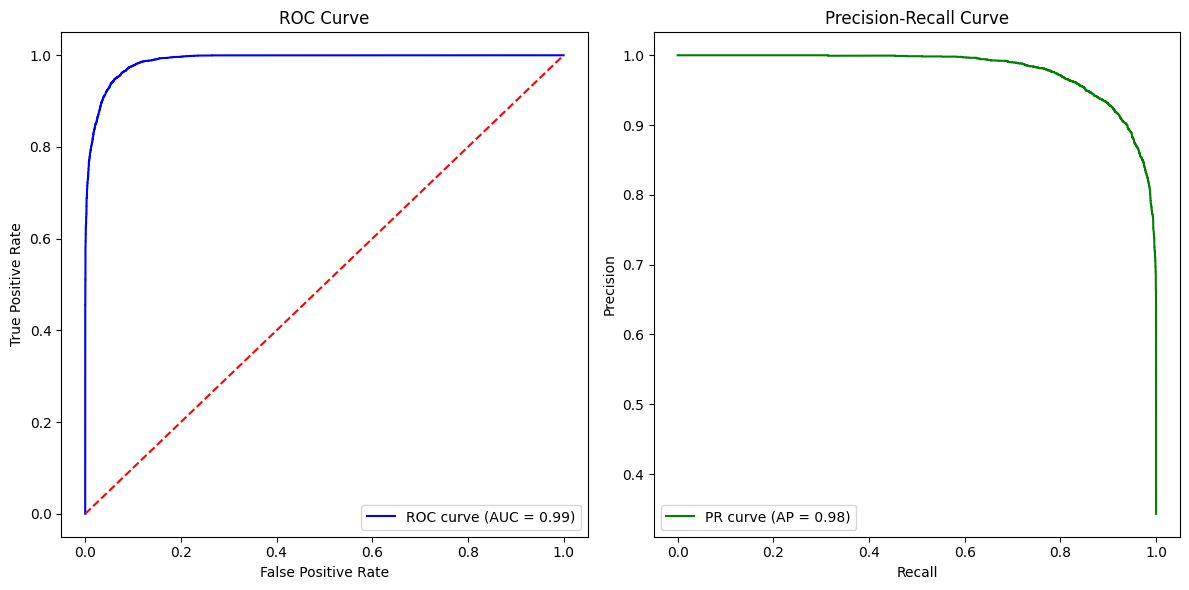

In [ ]:
##########################################################################################################################
# Get best model name (top model in leaderboard)
best_model = predictor.model_names()[0]
print(f"\nBest Model: {best_model}")

##########################################################################################################################
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions_proba.iloc[:, 1])  # Class 1 probabilities
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and AP
precision, recall, _ = precision_recall_curve(y_test, predictions_proba.iloc[:, 1])
average_precision = average_precision_score(y_test, predictions_proba.iloc[:, 1])

# Plot ROC and PR Curves
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


In [ ]:
################ Appendix A: Ablation Study on AutoGluon Hyperparameter Settings ################


In [3]:
# =========================
# AutoGluon Ablation Study (with G-Mean, Fixed scheduler='local')
# =========================

from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, confusion_matrix
import pandas as pd
import numpy as np
import time
import json
import math

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from JSON
with open('/content/drive/MyDrive/DELTAIoT1.1_DATASETS_used_for_JOURNAL/DELTAIoT1/Binary_dataset_with_selected_features.json', 'r') as f:
    data = json.load(f)

x = np.array(data['features'])
y = np.array(data['labels'])

# Split and scale data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

train_data = pd.DataFrame(x_train)
train_data['label'] = y_train
test_data = pd.DataFrame(x_test)
test_data['label'] = y_test

# Fixed model hyperparameters
hyperparameters = {
    'NN_TORCH': {},
    'FASTAI': {},
}

# Define ablation configurations (scheduler fixed to 'local')
ablation_configs = [
    # Vary time_limit
    {'name': 'TL_180', 'time_limit': 180, 'num_trials': 5, 'searcher': 'auto'},
    {'name': 'TL_300', 'time_limit': 300, 'num_trials': 5, 'searcher': 'auto'},
    {'name': 'TL_600', 'time_limit': 600, 'num_trials': 5, 'searcher': 'auto'},

    # Vary num_trials (3, 5, 10)
    {'name': 'NT_3', 'time_limit': 300, 'num_trials': 3, 'searcher': 'auto'},
    {'name': 'NT_5', 'time_limit': 300, 'num_trials': 5, 'searcher': 'auto'},
    {'name': 'NT_10', 'time_limit': 300, 'num_trials': 10, 'searcher': 'auto'},

    # Vary searcher
    {'name': 'SRCH_auto', 'time_limit': 300, 'num_trials': 5, 'searcher': 'auto'},
    {'name': 'SRCH_random', 'time_limit': 300, 'num_trials': 5, 'searcher': 'random'},
    {'name': 'SRCH_bayes', 'time_limit': 300, 'num_trials': 5, 'searcher': 'bayesopt'},
]

results = []

for config in ablation_configs:
    print(f"\n===== Running: {config['name']} =====")

    hpo_kwargs = {
        'num_trials': config['num_trials'],
        'scheduler': 'local',  # Fixed scheduler
        'searcher': config['searcher'],
    }

    start_time = time.time()
    predictor = TabularPredictor(label='label', verbosity=0).fit(
        train_data=train_data,
        time_limit=config['time_limit'],
        hyperparameters=hyperparameters,
        hyperparameter_tune_kwargs=hpo_kwargs
    )
    train_time = time.time() - start_time

    leaderboard = predictor.leaderboard(test_data, silent=True)
    print("\nLeaderboard:")
    print(leaderboard)

    test_pred = predictor.predict(test_data.drop(columns=['label']))
    acc = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    mcc = matthews_corrcoef(y_test, test_pred)

    # G-Mean calculation
    cm = confusion_matrix(y_test, test_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        gmean = math.sqrt(sensitivity * specificity)
    else:
        gmean = np.nan  # not binary

    best_model = leaderboard.iloc[0]['model']

    results.append({
        'Experiment': config['name'],
        'Accuracy': acc,
        'F1 Score': f1,
        'MCC': mcc,
        'G-Mean': gmean,
        'Train Time (s)': train_time,
        'Best Model': best_model,
    })

    print(f"Best model: {best_model} | Acc: {acc:.4f} | F1: {f1:.4f} | MCC: {mcc:.4f} | G-Mean: {gmean:.4f} | Time: {train_time:.2f}s")

# Show summary results
results_df = pd.DataFrame(results)
print("\n===== Final Ablation Results =====")
print(results_df)

# Save results to CSV
results_df.to_csv('/content/drive/MyDrive/autogluon_full_ablation_results.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

===== Running: TL_180 =====
+----------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI   |
+----------------------------------------------------+
| Search algorithm                 SearchGenerator   |
| Scheduler                        FIFOScheduler     |
| Number of trials                 5                 |
+----------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250706_182314/models/NeuralNetFastAI

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 5                |
+-----------------------------------

2025-07-06 18:53:09,379	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.




Leaderboard:
                      model  score_test  score_val eval_metric  \
0       WeightedEnsemble_L2    0.943981     0.9526    accuracy   
1   NeuralNetTorch/4ccafae0    0.942824     0.9508    accuracy   
2  NeuralNetFastAI/2d1f752d    0.939969     0.9446    accuracy   
3  NeuralNetFastAI/232260fb    0.939660     0.9428    accuracy   
4  NeuralNetFastAI/8ddb053a    0.936651     0.9410    accuracy   
5  NeuralNetFastAI/c5a91df1    0.923920     0.9308    accuracy   

   pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  \
0        0.358049       0.165212  217.349189                 0.003038   
1        0.053170       0.024764  128.525514                 0.053170   
2        0.190178       0.094903   61.374372                 0.190178   
3        0.111662       0.043931   27.344966                 0.111662   
4        0.153353       0.064394   14.675311                 0.153353   
5        0.091276       0.034302    9.994501                 0.091276   

   pred_ti

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 2570, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
                              ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1891, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1955, in _hyperparameter_tune
    hpo_executor.execute(
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/hpo/executors.py", line 424, in execute
    analysis = run(
               ^^^^
  File "/usr/local/lib/python3.11/dist-packages/autogluon/core/hpo/ray_hpo.py", line 227, in run
    searcher = _get_searcher(
           

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

In [ ]:
# sho